In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import category_encoders as ce

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Final.csv')


In [3]:
dataset

,Unnamed: 0,category_id,product_id,product,offer_price,regular_price,one_unit_price,quantity_unit,quantity,limited
0,0,8,292,Vanilla cake with coconut,4.80,8.0,0.00,pcs,14.0,1
1,1,7,295,"LETTMELK 0,5%",9.45,18.9,0.00,item,3.0,1
2,2,7,298,MANGO STK CEVITA,16.45,32.9,0.00,item,0.0,1
3,3,7,301,OST & SKINKESALAT,21.45,42.9,0.00,item,0.0,1
4,4,7,304,TACOSALAT,21.45,42.9,0.00,item,0.0,1
...,...,...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,FAMILIEBRØD,9.95,19.9,9.95,item,2.0,1
2078028,2078028,7,325,HELMELK,11.45,22.9,11.45,item,0.0,1
2078029,2078029,7,418,KYLLING KJØTTDEIG,21.95,43.9,21.95,item,1.0,1
2078030,2078030,7,1270,COTTAGE CHEESE,28.63,40.9,28.63,item,3.0,1


In [4]:
dataset.drop(['product','quantity_unit'], axis=1)

,Unnamed: 0,category_id,product_id,offer_price,regular_price,one_unit_price,quantity,limited
0,0,8,292,4.80,8.0,0.00,14.0,1
1,1,7,295,9.45,18.9,0.00,3.0,1
2,2,7,298,16.45,32.9,0.00,0.0,1
3,3,7,301,21.45,42.9,0.00,0.0,1
4,4,7,304,21.45,42.9,0.00,0.0,1
...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,9.95,19.9,9.95,2.0,1
2078028,2078028,7,325,11.45,22.9,11.45,0.0,1
2078029,2078029,7,418,21.95,43.9,21.95,1.0,1
2078030,2078030,7,1270,28.63,40.9,28.63,3.0,1


In [5]:
X = dataset[['category_id', 'product_id', 'regular_price', 'one_unit_price', 'quantity', 'limited']]
y = dataset['offer_price']
X

,category_id,product_id,regular_price,one_unit_price,quantity,limited
0,8,292,8.0,0.00,14.0,1
1,7,295,18.9,0.00,3.0,1
2,7,298,32.9,0.00,0.0,1
3,7,301,42.9,0.00,0.0,1
4,7,304,42.9,0.00,0.0,1
...,...,...,...,...,...,...
2078027,7,4531,19.9,9.95,2.0,1
2078028,7,325,22.9,11.45,0.0,1
2078029,7,418,43.9,21.95,1.0,1
2078030,7,1270,40.9,28.63,3.0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes = (200, 200, 200, 200, 200), activation = 'relu', solver = 'adam', max_iter = 500, learning_rate = 'adaptive')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200, 200, 200, 200, 200),
             learning_rate='adaptive', learning_rate_init=0.001, max_fun=15000,
             max_iter=500, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [1]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

NameError: ignored

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([39.51068736, 14.947235  , 19.32621591, ..., 26.86239481,
       12.92738933, 58.78200837])

In [ ]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

NameError: ignored

In [ ]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'offer_price')], axis = 1).round(2)
datasetPredict.head(10)

,index,category_id,product_id,regular_price,one_unit_price,quantity,limited,offer_price,PredictedGenPrice
0,1186898,7,1543,78.90,39.45,0.0,1,39.45,39.51
1,1536543,7,328,29.90,14.95,0.0,1,14.95,14.95
2,261072,7,1720,36.90,0.00,4.0,1,18.45,19.33
3,1839502,7,2056,53.64,74.50,0.0,1,26.82,27.09
4,114998,7,1753,31.90,0.00,0.0,1,15.95,16.65
5,402944,7,3073,22.90,0.00,0.0,1,11.45,12.29
6,102330,7,559,55.94,0.00,0.0,1,27.97,30.23
7,155456,7,724,21.90,0.00,0.0,1,10.95,11.48
8,1389665,7,14592,32.90,16.45,1.0,1,16.45,17.59
9,1020384,7,1462,67.90,33.95,0.0,1,33.95,33.62


In [ ]:
datasetPredict.corr()

,index,category_id,product_id,regular_price,one_unit_price,quantity,limited,offer_price,PredictedGenPrice
index,1.000000,-0.002688,0.175767,-0.006360,0.432383,0.001962,NaN,-0.004782,-0.012447
category_id,-0.002688,1.000000,-0.001213,-0.001523,-0.001067,0.000026,NaN,-0.001454,-0.001366
product_id,0.175767,-0.001213,1.000000,0.192999,0.152951,0.000916,NaN,0.189246,0.201935
regular_price,-0.006360,-0.001523,0.192999,1.000000,0.350109,0.000680,NaN,0.973921,0.944720
one_unit_price,0.432383,-0.001067,0.152951,0.350109,1.000000,0.000824,NaN,0.370722,0.343338
quantity,0.001962,0.000026,0.000916,0.000680,0.000824,1.000000,NaN,0.000698,-0.318280
limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offer_price,-0.004782,-0.001454,0.189246,0.973921,0.370722,0.000698,NaN,1.000000,0.926104
PredictedGenPrice,-0.012447,-0.001366,0.201935,0.944720,0.343338,-0.318280,NaN,0.926104,1.000000


In [ ]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

In [ ]:
#MSE


from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))



In [ ]:
#MAPE

def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
#Visualise



import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()



In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# prediksi
# model.predict([x_test.iloc[0]])

# score accuracy
model.score(X_train, y_train) * 100

94.65661461996358

In [10]:
model.score(X_test, y_test) * 100

94.9525139553691

[4.95800965e-09 2.73508750e-02 9.19151450e-01 5.03057913e-02
 3.19187916e-03 0.00000000e+00]


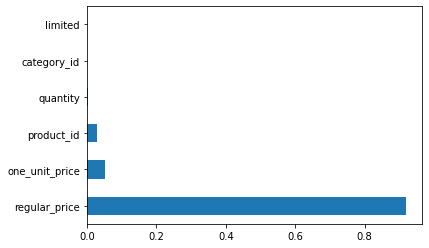

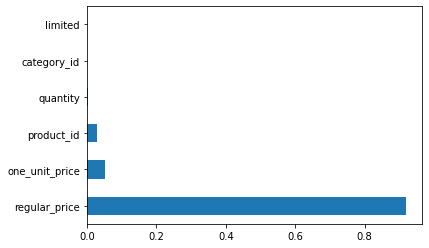

In [12]:

### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Decision Tree Score on Training set is 0.9936798792948484
Decision Tree Score on Test Set is 0.9556358485707341
[0.95649123 0.95744042 0.95895472 0.95677593 0.95912396]
Accuracy: 95.78 %
Standard Deviation: 0.11 %
Mean Absolute Error: 1.182053777179661
Mean Squared Error: 29.92836448700429
RMSE: 5.470682268876917
The r2_score is 0.9556358485707341


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


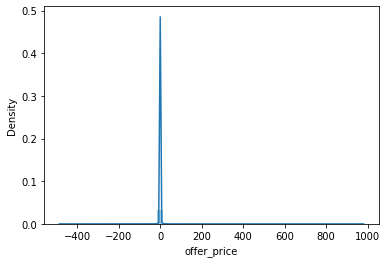

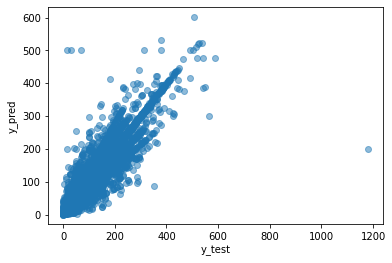

In [20]:
# DT
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:

import pickle
pickle.dump(rf_reg, open("rf_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("rf_reg.pkl", "rb"))

#model.predict([[]])

In [ ]:
#SVM
regressor = SVR(C = 10)
regressor.fit(X_train, y_train)

In [ ]:
SVR (C = 100.0, cache_size = 200, coef0 = 0.0, degree = 3, epsilon = 0.1, gamma = 'scale', kernel = 'rbf',
     max_iter = -1, shrinking = True, tol = 0.001, verbose = False)